# Machine Learning Assignment 1

### Aditya Rathi
#### Contents
 
1. Introduction 
2. Data
3. Method
4. Experiments
6. Conclusion
7. Refrences
8. Extra Credits


# Introduction


The aim of the assignment is to perform linear regression on a dataset to predict the volume of the traffic based on the weather, holiday, date, time, temperature, etc. The features have been explained in the data section followed by the two methods which have been used to perform linear regression. Its followed by the experiements and conclusion of the assignment. 

The two methods used in this assignment are Least Squares Method and Least Mean Squares Method expalined as follows:

1. Least Squares Method: The "least squares" method is a form of mathematical regression analysis used to determine the line of best fit for a set of data, providing a visual demonstration of the relationship between the data points. Each point of data represents the relationship between a known independent variable and an unknown dependent variable.


2. Least Mean Squares: Least Mean Square Algorithms are those that are derived from the mathematical Least Mean Square Estimation. This is one of the most famously occurring methods in Estimation theory and leads to many more classes of Estimation methods.In Least Mean Square Algorithms try to minimize the Mean Squared Error caused due to external disturbances on data.




# Data


## Regression Data

The data I have selected for the regression model is India metro data in which the output is to predict the future traffic based on feature of weather, time, date, holidays, etc. 

#### Data Source: -
https://www.kaggle.com/umairnsr87/indian-metro-data

##### Features of the dataset: -

1. date_time: -Date, time, and hour of the data that is collected in the local IST time
2. is_holiday: Categorical Indian national holidays combined with regional holidays
3. air_pollution_index: - Air Quality Index (10-300)
4. humidity: -Numeric humidity in Celsius
5. wind_speed: -Numeric wind speed in miles per hour
6. wind_direction: -Cardinal wind direction (0-360 degree)
7. visibility_in_miles: -Visibility of distance in miles
8. dew_point: -Numeric dew point in Celsius
9. temperature: -Numeric average temperature in Kelvin
10. rain_p_h: -Numeric amount in mm of rain that occurred in the hour
11. snow_p_h:: -Numeric amount in mm of snow that occurred in the hour
12. clouds_all: -Numeric percentage of cloud cover
13. weather_type: -Categorical short textual description of the current weather
14. weather_description: -Categorical longer textual description of the current weather





### Code

#### Reading Data

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [36]:
df1=pd.read_csv('trafficlear.csv')
df1.head()

,Unnamed: 0,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,date,time
0,0,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012-10-02,09:00:00
1,1,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012-10-02,10:00:00
2,2,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012-10-02,11:00:00
3,3,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012-10-02,12:00:00
4,4,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012-10-02,13:00:00


### Preprocessing of the Data

As you can see in the above command there are lot of preprocessing which is need to be done like converting the 'is_holiday' column which has string values which needs to be converted into int values before passing in to the linear model. I have done the mapping of all the data with integer data. The columns data which are categorized in this format are 'is_holiday, 'weather_type','weather_description','time'. The date columns is converted in to numerical equivalent of the data using datetime library

In [37]:
weather_mapping = {'Clouds':1, 'Clear':2, 'Rain':3, 'Drizzle':4, 'Mist':5, 'Haze':6, 'Fog':7,'Thunderstorm':8, 'Snow':9, 'Squall':10, 'Smoke':11}
df1['weather_type'] = df1['weather_type'].map(weather_mapping)
weather_description={'scattered clouds':1, 'broken clouds':2, 'overcast clouds':3,'sky is clear':4, 'few clouds':5, 'light rain':6,'light intensity drizzle':7, 'mist':8, 'haze':9, 'fog':10,       'proximity shower rain':11, 'drizzle':12, 'moderate rain':13,       'heavy intensity rain':14, 'proximity thunderstorm':15,       'thunderstorm with light rain':16, 'proximity thunderstorm with rain':17,       'heavy snow':18, 'heavy intensity drizzle':19, 'snow':20,       'thunderstorm with heavy rain':21, 'freezing rain':22, 'shower snow':23,       'light rain and snow':24, 'light intensity shower rain':25, 'SQUALLS':26,       'thunderstorm with rain':27, 'proximity thunderstorm with drizzle':28,       'thunderstorm':29, 'Sky is Clear':30, 'very heavy rain':31,       'thunderstorm with light drizzle':32, 'light snow':33,       'thunderstorm with drizzle':34, 'smoke':35, 'shower drizzle':36,       'light shower snow':37, 'sleet':38}
df1['weather_description']=df1['weather_description'].map(weather_description)
holiday={'None':0, 'Columbus Day':1, 'Veterans Day':1, 'Thanksgiving Day':1,       'Christmas Day':1, 'New Years Day':1, 'Washingtons Birthday':1,       'Memorial Day':1, 'Independence Day':1, 'State Fair':1, 'Labor Day':1,       'Martin Luther King Jr Day':1}
df1['is_holiday']=df1['is_holiday'].map(holiday)
time={'09:00:00':9, '10:00:00':10, '11:00:00':11, '12:00:00':12, '13:00:00':13,       '14:00:00':14, '15:00:00':15, '16:00:00':16, '17:00:00':17, '18:00:00':18,      '19:00:00':19, '20:00:00':20, '21:00:00':21, '22:00:00':22, '23:00:00':23,       '00:00:00':0, '01:00:00':1, '02:00:00':2, '03:00:00':3, '04:00:00':4,       '05:00:00':5, '06:00:00':6, '08:00:00':8, '07:00:00':7}
df1['time']=df1['time'].map(time)
t=pd.to_datetime(df1['date'])
df1['new_date']=t
k=df1['new_date'].map(dt.datetime.toordinal)
df1['to_date']=k
df1.head()
df=df1.copy()

### Visualization

We are going to use first 10000 data points for easy computation of the data visualization

In [38]:
D=df.head(10000)

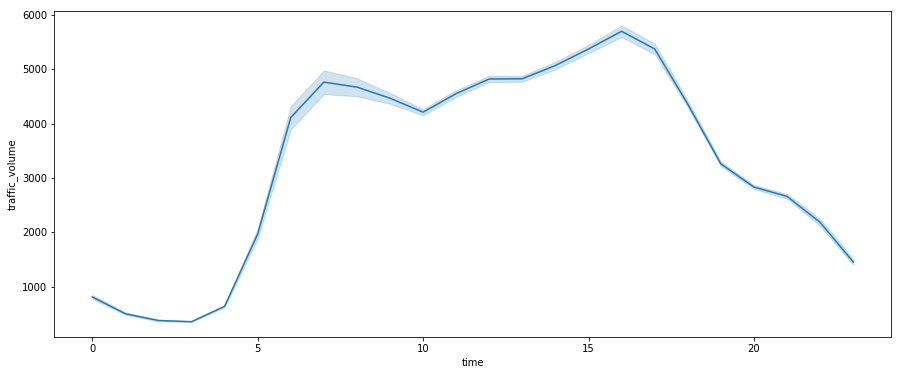

In [39]:
plt.figure(figsize=(15,6))
sns.lineplot(x="time", y="traffic_volume", data=D)

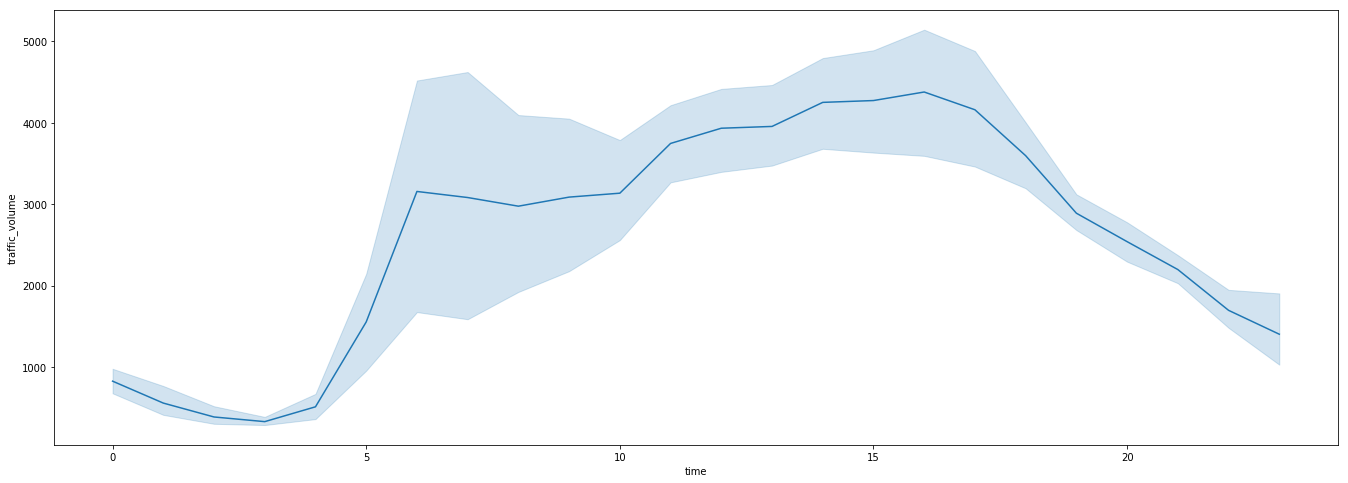

In [40]:
K=D[D['is_holiday']!=0]
#K
plt.figure(figsize=(23,8))
sns.lineplot(x="time", y="traffic_volume",data=K)

from the above two figures we can see the traffic volume is reduced during the holidays. 

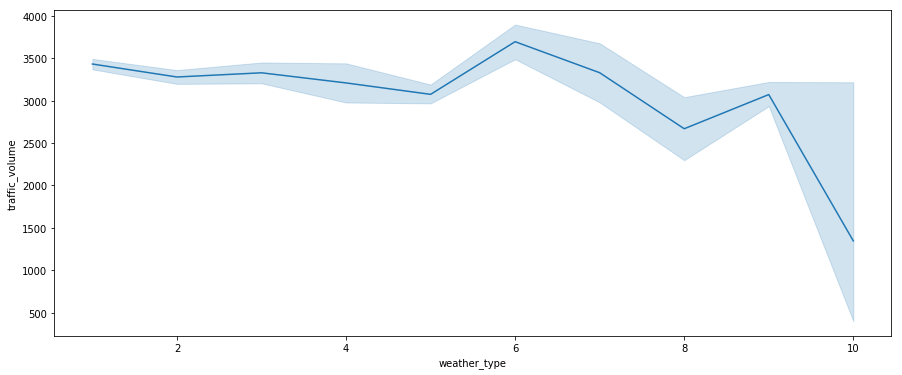

In [41]:
plt.figure(figsize=(15,6))
sns.lineplot(x="weather_type", y="traffic_volume", data=D)

from the above visualization we get to know the traffic volume based on the weather type we can see the volume of traffic decreases during squall and thunderstorm

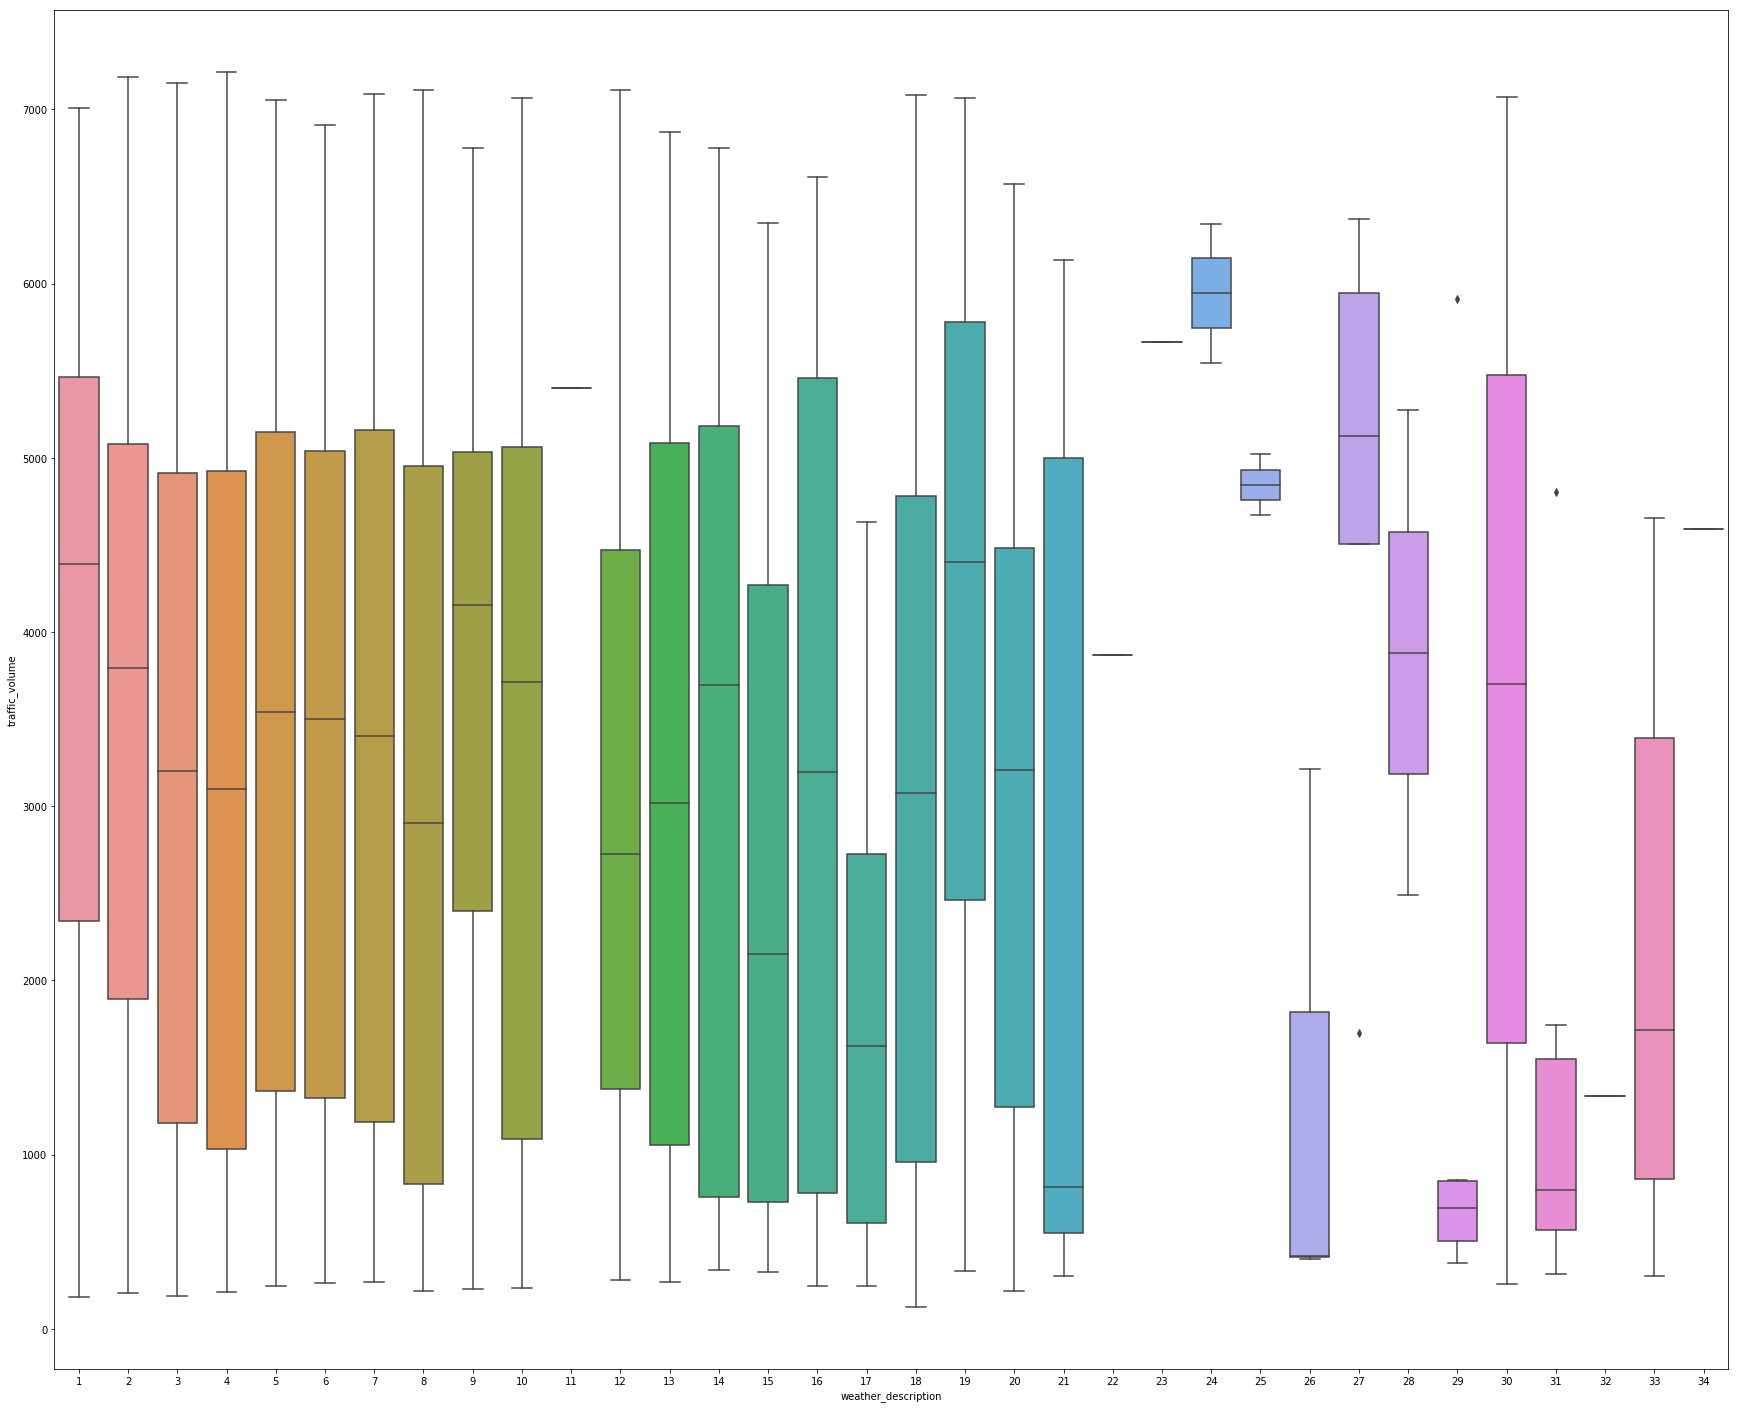

In [42]:
plt.figure(figsize=(30,25))
sns.boxplot(x='weather_description', y='traffic_volume', data=D)

from the above we can get the mean, median of the traffic volume with respect to the weather description. 

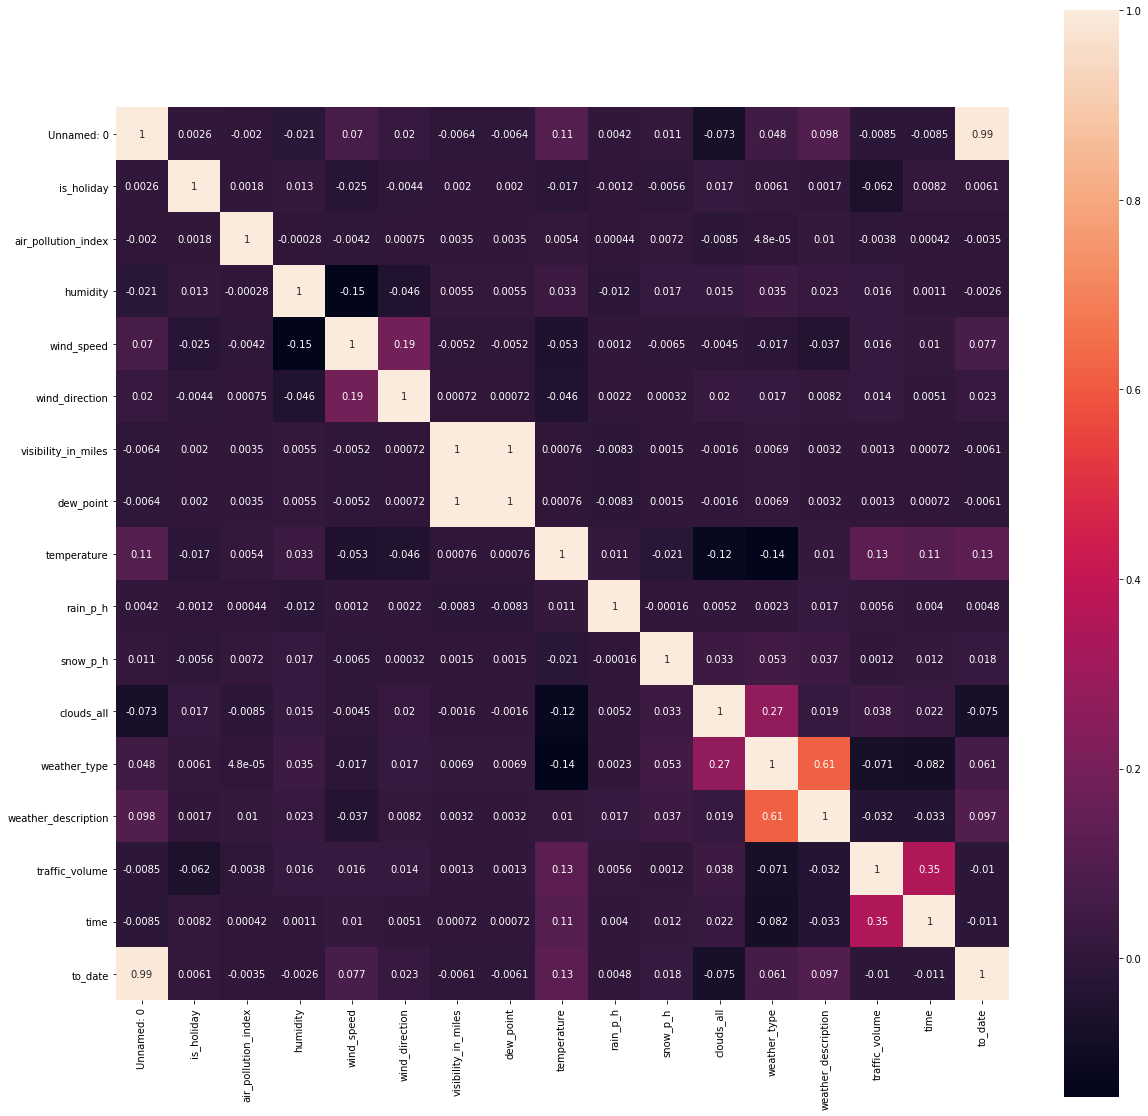

In [43]:
f = plt.subplots(figsize=(20, 20))
corr = df.corr()
sns.heatmap(data=corr, square=True, annot=True,cbar=True)
plt.show()

from the above coorelation we can see that traffic volume has negative coorelation with is_holiday, weather_type, weather_description it states that the traffic volume decreases with respect to the values in other column. And conversely we see positive coorelation between the traffic volume and time which is clear the traffic volume increases with respect to time of the day. There are even other things like traffic volume positive coorelation with temperature i.e the traffic volume increases when there is a good temperature and reduces when temperature outside is less. 

### Preliminary observation

1. We got to know the traffic volume of the vehicle with respect to each hour of the day giving us a basic shape of the line going down in the midnight to early dawn. And in the second figure we can compare it with the traffic volume during the holidays. 
2. Second is the weather type forcing the less number of vehicle during thunderstorms or squall and even during the mist the vehicular traffic is going down. 
3. During the sky when it is clear we get to see most of the traffic volume from the box plot visualization
4. There is a negative coorelation of is_holiday, weather_type, weather_description with traffic_volume and positive coorelation between traffic_volume with respect to temperature, time 


### Method

### Review Linear Model

1. Least Square
2. LMS 


#### Least Square 

The least squares criterion is a formula used to measure the accuracy of a straight line in depicting the data that was used to generate it. That is, the formula determines the line of best fit.This mathematical formula is used to predict the behavior of the dependent variables. The approach is also called the least squares regression line.

The least squares criterion is determined by minimizing the sum of squares created by a mathematical function. A square is determined by squaring the distance between a data point and the regression line or mean value of the data set.

A least squares analysis begins with a set of data points plotted on a graph. Independent variables are plotted on the horizontal x-axis while dependent variables are plotted on the vertical y-axis. The analyst uses the least squares formula to determine the most accurate straight line that will explain the relationship between an independent variable and a dependent variable.

To find the value of θ that minimizes the cost function, there is a closed-form solution , a mathematical equation that gives the result directly. This is called the Normal Equation.
The Normal Equation is 

$ θ= (X.X^{T})^{-1}.X^{T}.y $


#### Least Mean Square 

Least Mean Square Algorithms are those that are derived from the mathematical Least Mean Square Estimation. This is one of the most famously occurring methods in Estimation theory and leads to many more classes of Estimation methods.

In Least Mean Square Algorithms try to minimize the Mean Squared Error caused due to external disturbances on data.

The least mean square (LMS) algorithm assumes a linear model of the form $f(x;w)=w^{⊤}x=∑_{0}^{D}w_{i}x_{i} $, with  and a mean squared error loss function $ E(w)=∑_{i=1}^{N}(f(x_{i};w_{i})−t_{i})^{2} $ . It is based on the stochastic gradient descent method, thereby, at each time instant , the instantaneous error function  is minimized, with respect to , via the following update rule: $ w^{(k+1)}=w^{(k)}−α(w^{(k)^{⊤}}x_{k}−t_{k})x_{k}.  $


#### Implementation of Codes

##### Super Classs Definition

In [44]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        
        #self.wght=None
        """
            weight vector w is initialized as None
        """
        

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass

In the above code we can see that the Base Model and Linear Model which is the base for the Least Square and LMS implementation.

The major code written in the base model and Linear model are check matrix and add ones to the matrix.

The check_matrix is just to check the matrix if it is 2Dimensional matrix then it good or else raise an exception of Wrong Matrix

The add ones is just to reshape the array to fit the matrix multiplication


### Least Square

In [45]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train least-squares model
    def train(self, X, T):
        d = self.add_ones(X)
        #print('Before: -',self.w,d.shape)
        self.w = np.linalg.inv(d.T @ d) @ d.T @ T 
        #print(self.w)
        return self.w
    
    # apply the learned model to data X
    def use(self, X):
        
        d = self.add_ones(X)
        #print(self.w,d.shape)
        y = d @ self.w
        #print(y)
        
        return y

The above code is the Least Square model is written 

Here in the train defination we can see the normal equation formula is used to calculate the minimised cost function value that can be used for prediction in the 'use' function.

You can see the formula of θ = inverse(X.XT).XT.y


### LMS

In [46]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    w = np.zeros([1,1])
    alpha = 0.001
    
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x,t in zip(X,T):
            self.train_step(x,t)
        
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        d = np.hstack((np.ones(1),x))
        n = d.shape[0]
        #print("Before If:",self.w)
        #print(len(self.w),N,x.shape)
        if(len(self.w)!=n):
            self.w = np.zeros(n)
        #print("After If:",self.w)
        y = self.w @ d
        self.w -= self.alpha * (y - t) * d
    
# apply the current model to data X
    def use(self, X):
        #print(X)
        n = X.shape[0]
        d = np.hstack((np.ones((n, 1)), X.reshape((X.shape[0], -1))))
        #print(self.w)
        y = d @ self.w
        #print(y)
        n = d.shape[0]
        y.shape = (n,1)
        return y
        

We have implemented the LMS in above cell.

The main functions included in the LMS are train, train_step and use function

We used the LMS equation of w(k+1)=w(k)−α(w(k)⊤xk−tk)xk to get the value of minimum cost function. It is written in the train_step function

This is used to predict values in the 'use' defination

The train step function trains the data one step at a time. It is a 1D vector.

This is later used to predict the traffic volume to our dataset.


#### Preliminary Test

In [47]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
#model_names =['LS']
#models=[LinearRegress()]
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


#### Experiments

I used the sample size of 33000 data sample for training our data. The data seperated in 80 to 20 percent for training and testing. The columns we got to know from the coorelation matrix that temperature, time, weather_type, is_holiday, etc have been used for training the data.

The traffic volume which we want to predict is in T variable. 




In [48]:
data = df.sample(33000)

sampling of training and testing data on the basis of 30000 to 3000 data rows.

In [49]:

X = data[['temperature','weather_type','time','is_holiday','rain_p_h','clouds_all','weather_description','to_date']].copy()
T = data[['traffic_volume']].copy()

X_Training = X.iloc[:30000,:]
X_Testing = X.iloc[30000:33000,:]
T_Training = T.iloc[:30000,:]
T_Testing = T.iloc[30000:33000,:]


X_Train = np.array(X_Training)
X_Test = np.array(X_Testing)
T_Train = np.array(T_Training)
T_Test = np.array(T_Testing)

##### Description of Code


Here we have created a object of LinearRegress to use the train and 

In [50]:
import math
from numpy import array
least = LinearRegress()
least.train(X_Train,T_Train)
pred = least.use(X_Test)
new_value=rmse(array(T_Test),array(pred))/math.sqrt(33000)
print(new_value)


553.923320387466


RMSE=squareroot(∑(Pi−Oi)^2/n)
 

Where

Pi is the predicted output

Oi is target output.

n is the number of observations

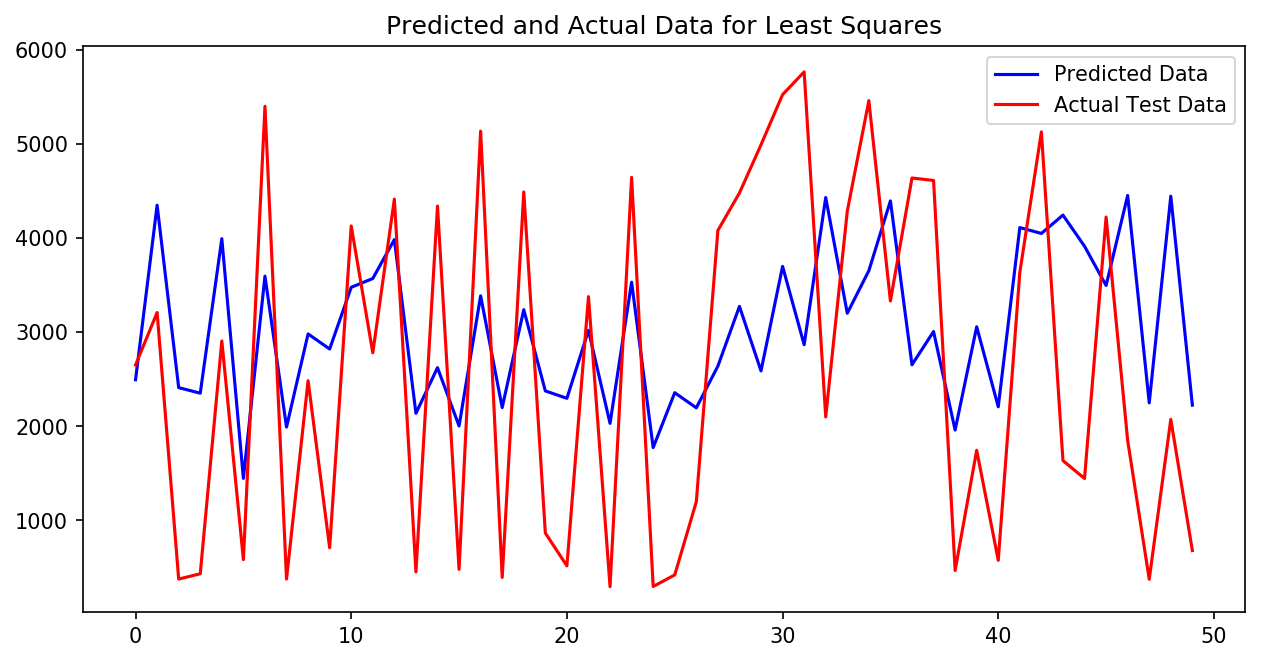

In [51]:
from numpy import array
fig=plt.figure(figsize=(10, 5), dpi= 150)
plt.plot(array(pred[350:400]),'-b',label='Predicted Data')
plt.plot(array(T_Test[350:400]),'-r',label='Actual Test Data')
plt.title("Predicted and Actual Data for Least Squares")
plt.legend()
plt.show()

The above visualization is the prediction V/s testing data. The pattern we can see follows the actual testing data.

#### Analysis of the above Least Square

The above Least Square class was passed with variety of parameter that gives the smallest rmse as possible. Least Square Method is totally dependent on the data we pass into the class.

The rmse varies according to the data we pass. The rmse value is also dependent on the quantity of training data which is given. The rmse value is reduced when the training data is more. 


In [52]:
data = df.sample(10000)
X = data[['temperature','weather_type','time','is_holiday']].copy()
#X = data[['temperature','weather_type','time','is_holiday','weather_description']].copy()
T = data[['traffic_volume']].copy()

X_Training = X.iloc[:8000,:]
X_Testing = X.iloc[8000:10000,:]
T_Training = T.iloc[:8000,:]
T_Testing = T.iloc[8000:10000,:]


X_Train = np.array(X_Training)
X_Test = np.array(X_Testing)
T_Train = np.array(T_Training)
T_Test = np.array(T_Testing)

In [53]:
lms = LMS(0.000005)
lms.train(X_Train,T_Train)
pred = lms.use(X_Test)

In [54]:
rmse(T_Test,pred)/math.sqrt(10000)

1127.0533317117759

In [55]:
pred

array([[4085.60304122],
       [5788.22773267],
       [4440.93736614],
       ...,
       [5729.81588924],
       [4042.92494899],
       [3971.23302608]])

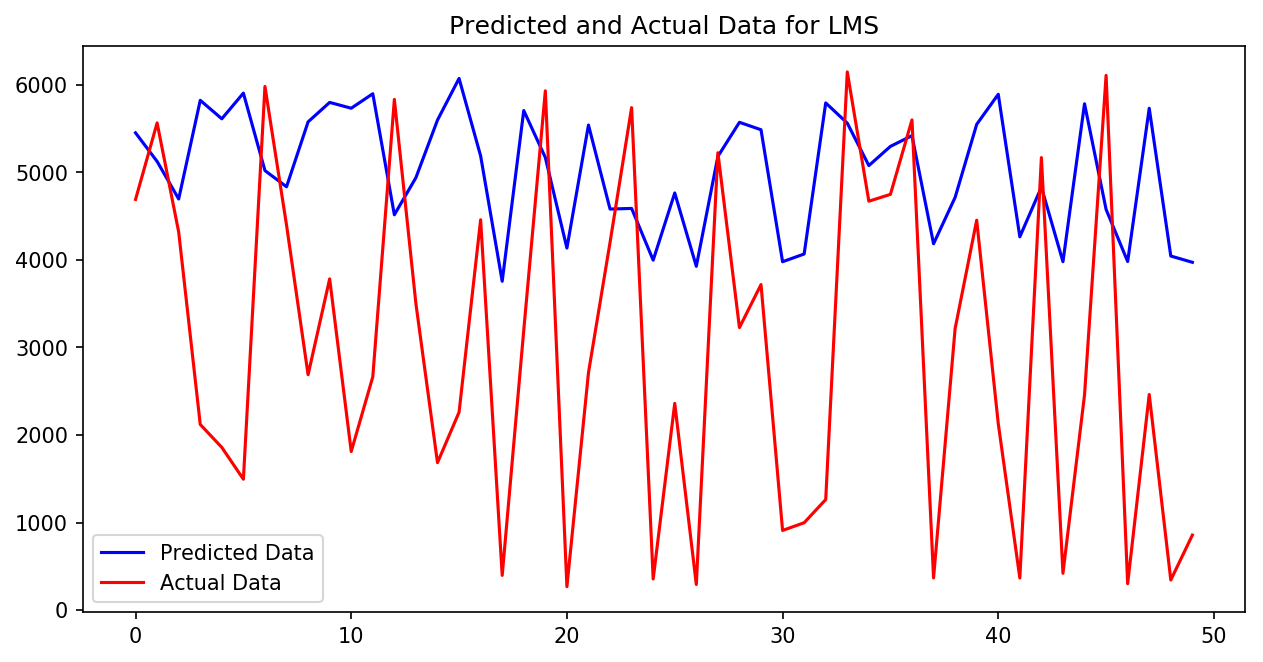

In [56]:
fig=plt.figure(figsize=(10, 5), dpi= 150)
plt.plot(pred[1950:2000],'-b',label='Predicted Data')
plt.plot(T_Test[1950:2000],'-r',label='Actual Data')
plt.title("Predicted and Actual Data for LMS")
plt.legend()
plt.show()

#### Analysis of LMS: -

The data was sampled in to 10000 data points not like least square for saving computational time.

The rmse value is bigger than the least square values. But after looking at the prediction V/s test data of both least square and LMS we know that both of them follow the pattern of the prediciton. 

The learning rate which is sent to the function has to be adjusted everytime the data sample of 10000 data points is changed. The smallest rmse values range roughly between 0.000005 to 0.000025. I had to try it various learning rate so that I can get a perfect rmse value which can be applied on the data. 

#### Comparisions of the two algorithms 

From the above both least square and LMS we have seen the main factor i.e. rmse value which plays the main role while predicting anything gives clear indication that least square method is more suitable for making prediction than LMS.

One thing which I found while giving data is least square performs well when the quantity of data which is given for trainig is more. I tried first with 10000 data points rmse was more. but after increasing the training data the rmse value got lowered. So one of the points is more the training data less is the rmse value for least square method.

Vice a versa the rmse value was less for less data in LMS method. I tried doing it with 30000 data points but the rmse was more. But after reducing the data samples to 10K samples. the rmse performed well. 

One more thing that matters is in Least square we just have to write a single equation, where as the LMS it weight is calculated for every iteration.

From the above all points my conclusion would be least square method performs well in respect to rmse values and to understand the equation least square is easy to understand compare to LMS.


## Conclusion

In this assignment the least square method and LMS both where used to predict the traffic volume. The rmse scores of both the method were compared and through this we came to know that the least square method has lesser rmse score than LMS method. And in the prespective of learning this method the least square method is easier to understand. The Least square method performs well when the amount of training data is big. The learning rate has to be varied everytime to get a good result of rmse values in LMS model



### Refrences

Indian Metro Data. (n.d.). Retrieved from https://www.kaggle.com/umairnsr87/indian-metro-data

Géron, A. (2017). Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. Sebastopol, CA: O'Reilly Media.

Matplotlib: Python plotting — Matplotlib 3.1.1 documentation. (n.d.). Retrieved from https://matplotlib.org/index.html

seaborn.lineplot — seaborn 0.9.0 documentation. (n.d.). Retrieved from https://seaborn.pydata.org/generated/seaborn.lineplot.html

Where Developers Learn, Share, & Build Careers. (n.d.). Retrieved from https://stackoverflow.com/

The University of Utah.Retrieved from https://www.cs.utah.edu/~zhe/pdf/lec-8-lms-regression-upload.pdf

A computer science portal for geeks. (n.d.). Retrieved from https://www.geeksforgeeks.org/

Overview — NumPy v1.17 Manual. (n.d.). Retrieved from https://docs.scipy.org/doc/numpy/index.html


### Extra Credits


1. what is the most and least significant features for your data.


Most significant feature of Data : - 
- time
- is_holiday
- temperature
- weather_type

Least significat feature of Data
- to_date
- weather_description
- rain_p_h
- clouds_all


In [57]:
data=df.sample(10000)
X1 = data[['time','is_holiday', 'temperature','weather_type']].copy()
T1 = data[['traffic_volume']].copy()
X1_on_train = X1.iloc[:8000,:]
X1_on_test = X1.iloc[8000:10000,:]
T1_on_train = T1.iloc[:8000,:]
T1_on_test = T1.iloc[8000:10000,:]
X1_train = np.array(X1_on_train)
X1_test = np.array(X1_on_test)
T1_train = np.array(T1_on_train)
T1_test = np.array(T1_on_test)


X2 = data[['to_date','weather_description','rain_p_h','clouds_all']].copy()
T2 = data[['traffic_volume']].copy()
X2_on_train = X2.iloc[:8000,:]
X2_on_test = X2.iloc[8000:10000,:]
T2_on_train = T2.iloc[:8000,:]
T2_on_test = T2.iloc[8000:10000,:]
X2_train = np.array(X2_on_train)
X2_test = np.array(X2_on_test)
T2_train = np.array(T2_on_train)
T2_test = np.array(T2_on_test)




In [58]:
lr1 = LinearRegress()
lr1.train(X1_train,T1_train)
predicted1 = lr1.use(X1_test)


lr2 = LinearRegress()
lr2.train(X2_train,T2_train)
predicted2= lr2.use(X2_test)




In [59]:
print("With significant features rmse :-",rmse(T1_test,predicted1)/math.sqrt(10000))
print("With least significant features rmse :-",rmse(T2_test,predicted2)/math.sqrt(10000))

With significant features rmse :- 836.6024773299465
With least significant features rmse :- 897.4194200628128


In [60]:
print(predicted2)
if(predicted2[0]>60000000):
    predicted2=predicted2/20000
print(predicted2)

[[3167.69570914]
 [3368.11245866]
 [3163.07758215]
 ...
 [3366.5113103 ]
 [3335.36225892]
 [3012.82605976]]
[[3167.69570914]
 [3368.11245866]
 [3163.07758215]
 ...
 [3366.5113103 ]
 [3335.36225892]
 [3012.82605976]]


We Can see here the predicted value with Insignificant features is way off than actual values i.e. why we need significant features while predicting. for some of the sample of data the predicted value is tremendously more than expected for this to normalize the predicted value to fit on graph we have to divide it by 20K.

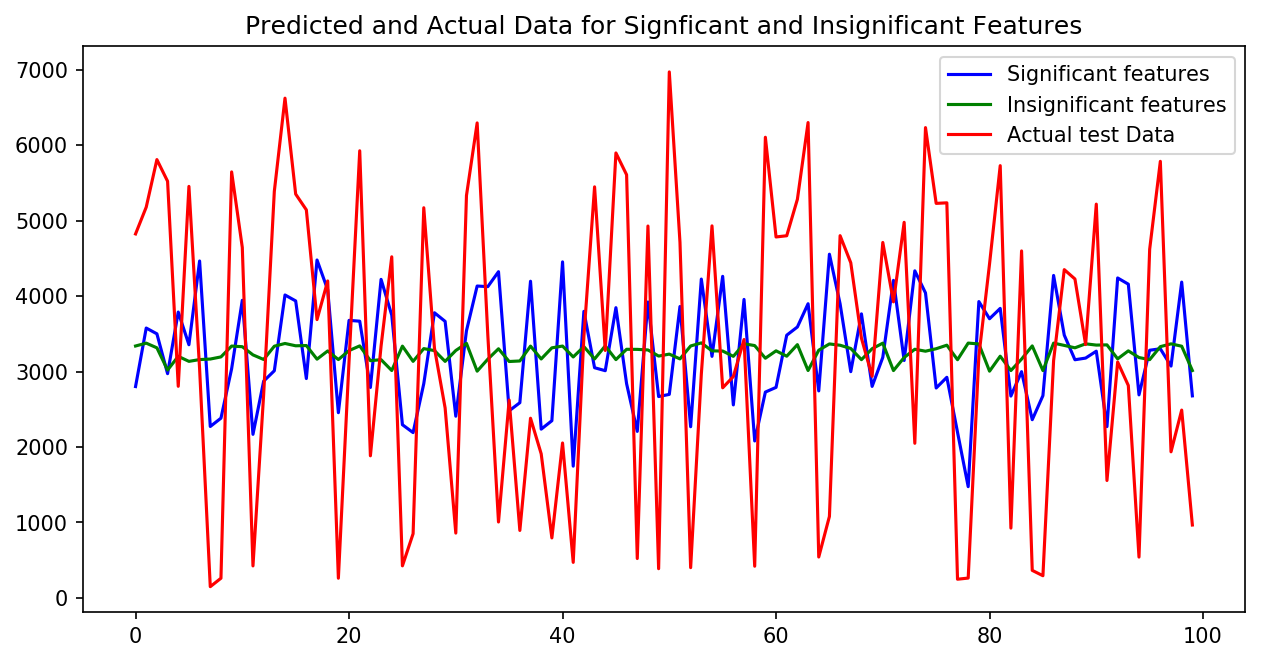

In [61]:
fig=plt.figure(figsize=(10, 5), dpi= 150)
plt.plot(predicted1[1900:2000],'-b',label='Significant features')
plt.plot(predicted2[1900:2000],'-g',label='Insignificant features')
plt.plot(T1_test[1900:2000],'-r',label='Actual test Data')
plt.title("Predicted and Actual Data for Signficant and Insignificant Features")
plt.legend()
plt.show()

2. Analysis of LS model on just the significant features and Insignifican Features


In the above result we have seen both of the rmse values when least sgnificant features is removed and when most significant features is removed from the data. 

There is a huge rise in the value of rmse values when most significant features is not given for prediction. The value of the rmse values with least significant features passed to the least square is way off predicted to the testing data.  Such is the importance of the features which is used for prediction. 

You can see in the graph the green line i.e. the prediction with insignificant features doesn't follow the pattern as it is wanted


3. Residual Plot for significant features

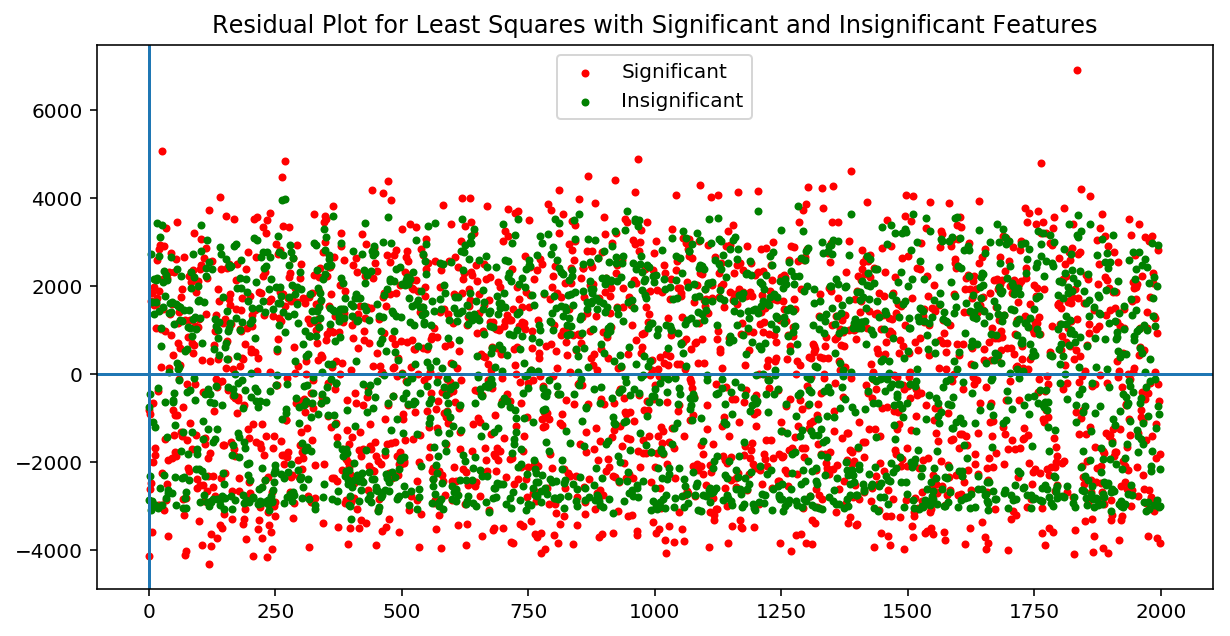

In [62]:
diff= T_Test - predicted1
num = np.arange(len(T_Test))
fig=plt.figure(figsize=(10, 5), dpi= 144)
plt.scatter(num,diff,marker='.',color='red',label='Significant')
plt.title("Residual Plot for Least Squares with Significant and Insignificant Features")

diff1 = T_Test - predicted2
num1 = np.arange(len(T_Test))
#fig=plt.figure(figsize=(10, 5), dpi= 144, facecolor='w', edgecolor='k')
plt.scatter(num1,diff1,marker='.',color='green',label='Insignificant')
plt.legend()
plt.axvline(0)
plt.axhline(0)
#plt.title("Residual Plot for Least Squares with Inignificant Features")

In the residual plot we can see that the Insignificant values form the bottom level or the top level of the residual plot. But the residual plot for significant values is spreaded all over the plot not concentrating in some areas of the graph.

From the plotting itself we know that the significant features is so much important for prediciting the traffic volumes